<a href="https://colab.research.google.com/github/BhekiMabheka/Explore/blob/main/How_Probability_Calibration_Works.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## How Probability Calibration Works

Probability calibration is the process of calibrating an ML model to return the true likelihood of an event. This is necessary when we need the probability of the event in question rather than its classification.

In [2]:
# Create dataset of classification task with many redundant and few informative features

import numpy as np
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import *
np.random.seed(0)

X, y = datasets.make_classification(n_samples=100000, n_features=20, n_informative=2, n_redundant=2)

train_samples = 100
X_train = X[:train_samples]
X_test  = X[train_samples:]
y_train = y[:train_samples]
y_test  = y[train_samples:]

model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_pred_rfc = model_rfc.predict(X_test)

print('Random Forest Classification Report:')
print(classification_report(y_true = y_test, y_pred = y_pred_rfc))

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

print('Logistic Regression Classification Report:')
print(classification_report(y_true = y_test, y_pred = y_pred_lr))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88     49904
           1       0.85      0.92      0.89     49996

    accuracy                           0.88     99900
   macro avg       0.88      0.88      0.88     99900
weighted avg       0.88      0.88      0.88     99900

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84     49904
           1       0.84      0.86      0.85     49996

    accuracy                           0.84     99900
   macro avg       0.85      0.84      0.84     99900
weighted avg       0.85      0.84      0.84     99900



The random forest classifier (RFC) got an F1 score of 0.89, which is not bad. The logistic regression performed just a bit worse than RF with a score of 0.85. But how well calibrated are they?

---

## Calibration plot

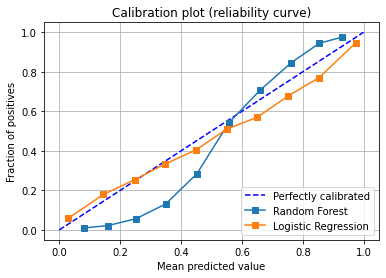

In [5]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot([0, 1], [0, 1], "b--", label="Perfectly calibrated")
ax.set_ylabel("Fraction of positives")
ax.set_xlabel("Mean predicted value")
ax.set_title('Calibration plot (reliability curve)')

prob_pos_rfc = model_rfc.predict_proba(X_test)[:, 1]
fraction_of_positives_rfc, mean_predicted_value_rfc = calibration_curve(y_test, prob_pos_rfc, n_bins=10)
ax.plot(mean_predicted_value_rfc, fraction_of_positives_rfc, "s-", label="%s" % ('Random Forest'))

prob_pos_lr = model_lr.predict_proba(X_test)[:, 1]
fraction_of_positives_lr, mean_predicted_value_lr = calibration_curve(y_test, prob_pos_lr, n_bins=10)
ax.plot(mean_predicted_value_lr, fraction_of_positives_lr, "s-", label="%s" % ('Logistic Regression'))

ax.legend(loc="lower right")
plt.grid()
fig.savefig('02_rf_lr.png', tight=True, quality=100)